# Terrorism

importing libraries 

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from wordcloud import WordCloud
import nltk

In [2]:
# Let's import to our data and check the basics.
data = pd.read_csv('F:\Oasis\lets\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [3]:
data.head

<bound method NDFrame.head of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970010e+11   1970       1     0        NaN         0        NaN   
3       1.970010e+11   1970       1     0        NaN         0        NaN   
4       1.970010e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.017120e+11   2017      12    31        NaN         0        NaN   
181687  2.017120e+11   2017      12    31        NaN         0        NaN   
181688  2.017120e+11   2017      12    31        NaN         0        NaN   
181689  2.017120e+11   2017      12    31        NaN         0        NaN   
181690  2.017120e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region  

In [4]:
data.shape

(181691, 135)

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [7]:
data.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
data.dtypes

eventid       float64
Year            int64
Month           int64
Day             int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

# NLP

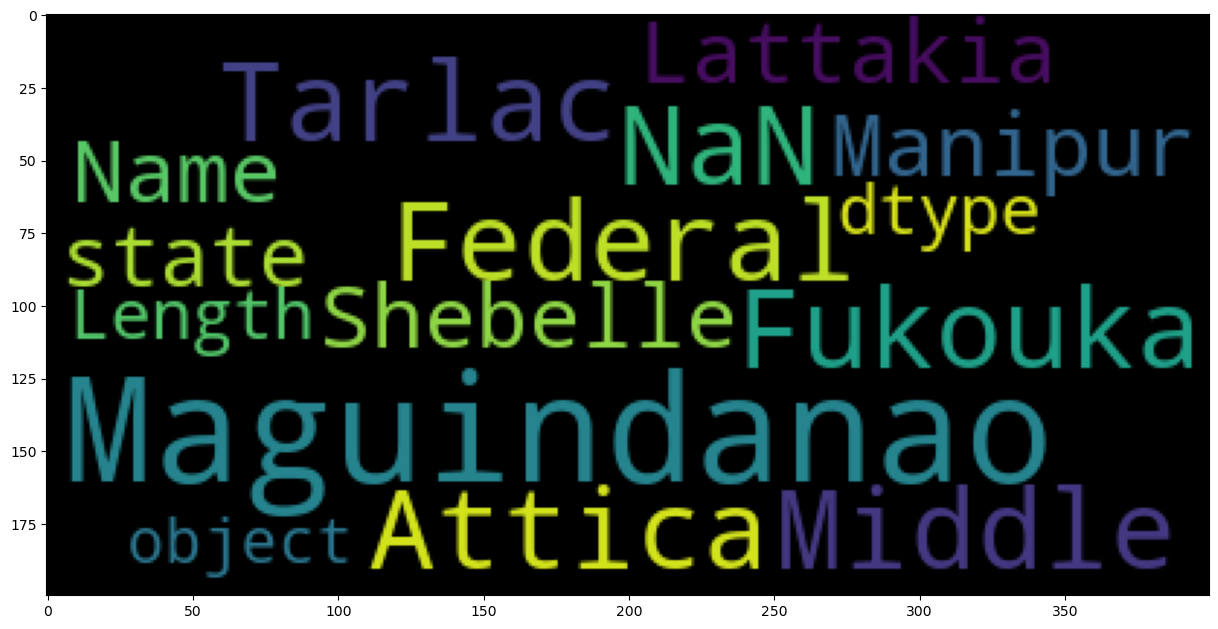

In [9]:
wc=WordCloud(max_words=50)
Cloud=wc.generate(str(data.state))
fig=plt.figure(figsize=(15,15)) 
plt.imshow(Cloud)

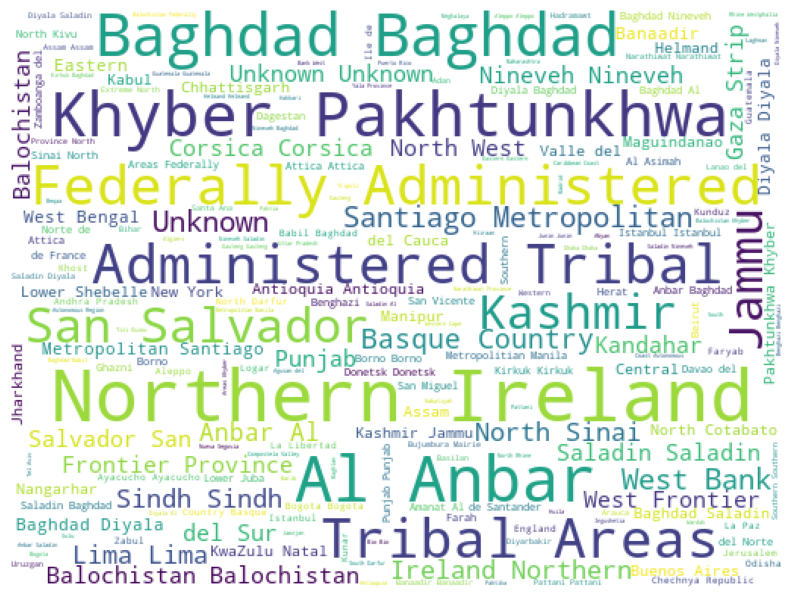

In [10]:
from wordcloud import WordCloud
from scipy import signal
cities = data.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# EDA

<AxesSubplot:ylabel='Year'>

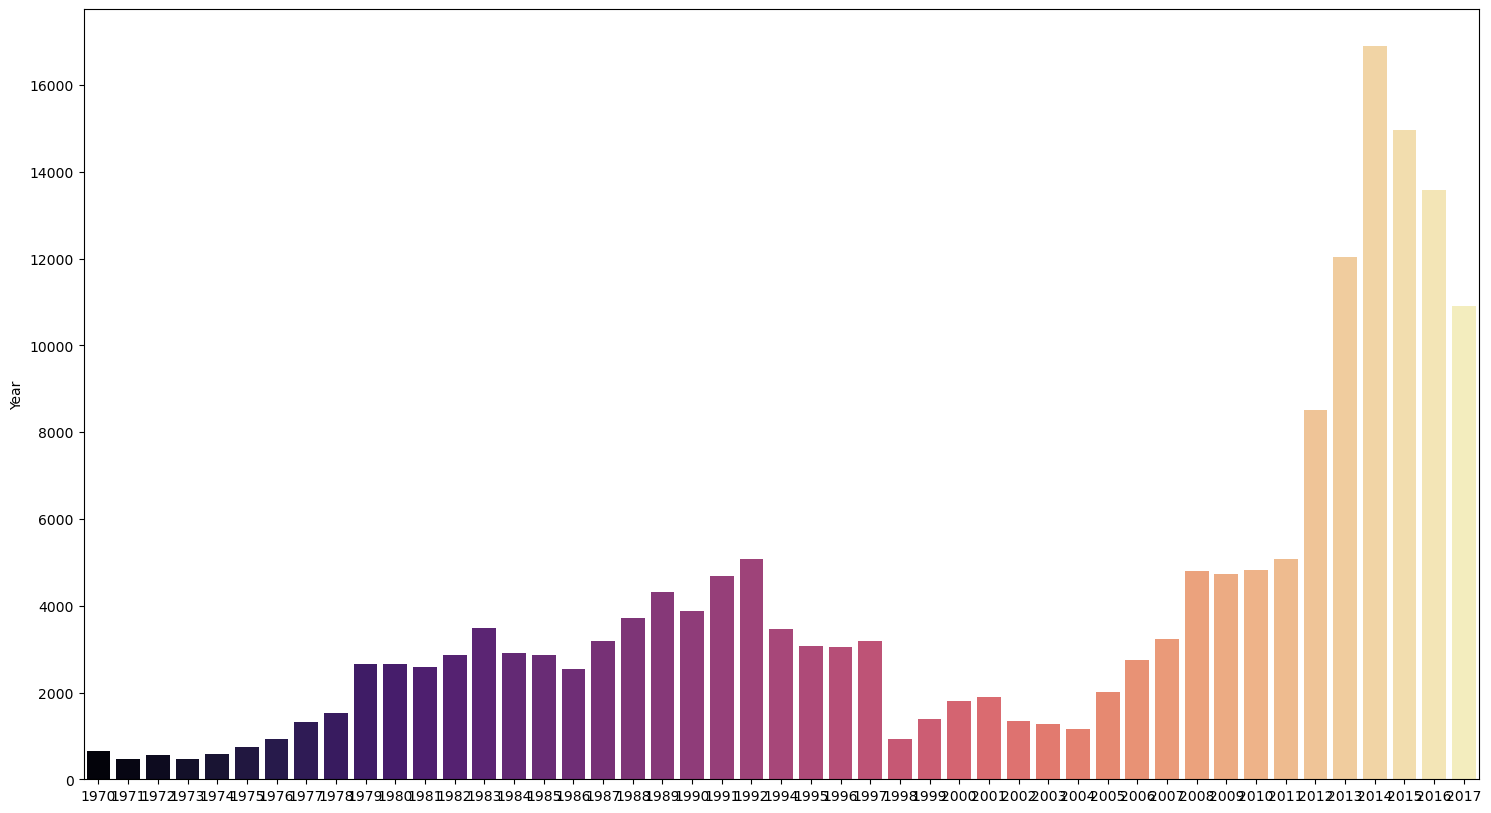

In [11]:
x = data['Year'].unique()
y = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x,
           y = y,
           palette = "magma")

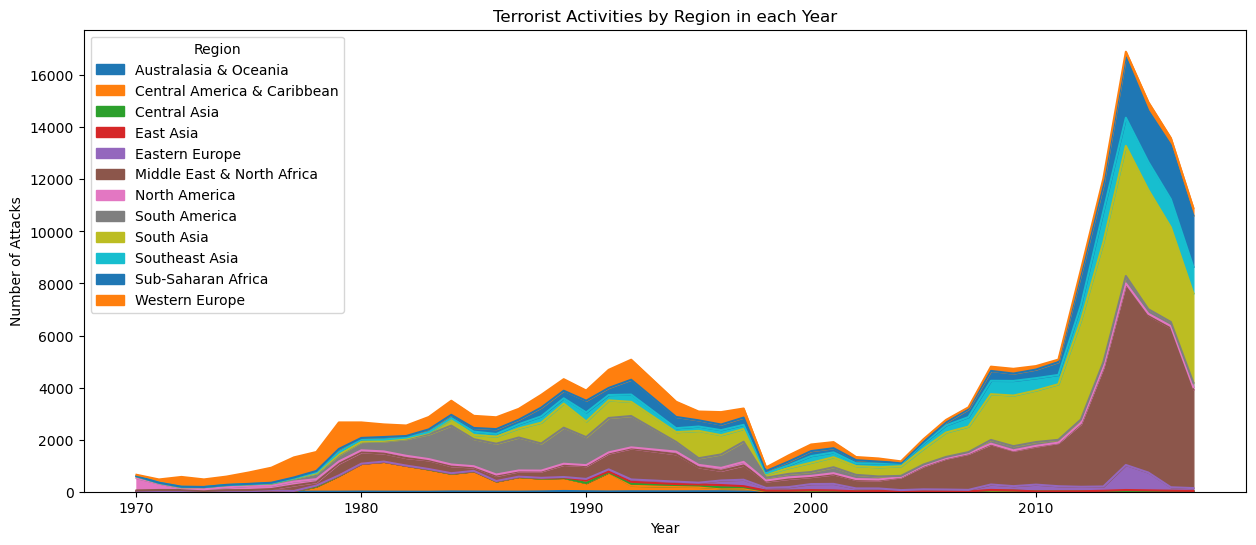

In [12]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()


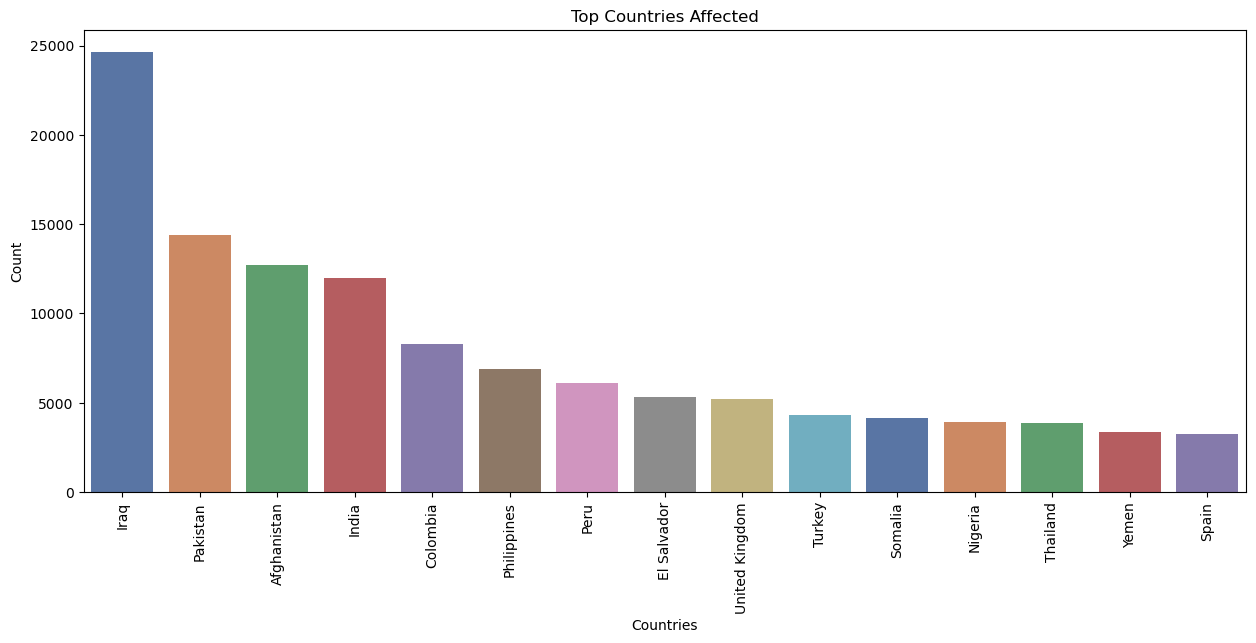

In [13]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='deep')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()